## Libraries

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim  as optim
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import tqdm
from skimage import transform,io

## Data

In [2]:
train=datasets.MNIST(r'Nmnist',train=True,download=True,transform=transforms.Compose([
    transforms.ToTensor()
]))

test=datasets.MNIST(r'Nmnist',train=False,download=True,transform=transforms.Compose([
    transforms.ToTensor()
]))

trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset= torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

## Network

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        
        self.fc1=nn.Linear(32*4*4, 170, bias=True)
        self.fc2=nn.Linear(170, 56, bias=True)
        self.fc3=nn.Linear(56, 10, bias=True)
    
    def forward(self,x):
        
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        
        x = torch.flatten(x, start_dim=1)
        
        x= F.relu(self.fc1(x)) 
        x= F.relu(self.fc2(x))
        x= self.fc3(x)
        
        return F.softmax(x, dim=1)

## CUDA

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    net_class = Net().to(device)
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    net_class = Net()
    print("Running on the CPU")


Running on the GPU


## Training

In [5]:
optimizer = optim.Adam(net_class.parameters(),lr= 0.0001)
loss_function = nn.CrossEntropyLoss()

epochs=3
loss_grap=[]
mean_grap=[]
prin = True

for epoch in range(epochs):
    loss_mean=0
    for data in tqdm(trainset, desc='Loss calculation'):
        
        x,y=data
          
        x,y = x.to(device), y.to(device)
        
        net_class.zero_grad()
        
        output=net_class(x.view(-1,1,28,28))
        
        if prin:
            print(f'Output shape: {output.shape}\t Y shape: {y.shape}')
            prin = False
        
        loss = loss_function(output, y)
        
        loss.backward()
        
        optimizer.step()
        
        loss_grap.append(loss)
    
        loss_mean+=loss
        
    print(f'Epoch {epoch+1} error mean {(((loss_mean/len(trainset)).item())):.5f}')
    mean_grap.append(((loss_mean/len(trainset)).item()))

Loss calculation:   0%|          | 0/6000 [00:00<?, ?it/s]

Output shape: torch.Size([10, 10])	 Y shape: torch.Size([10])


NameError: name 'brake' is not defined

## Error

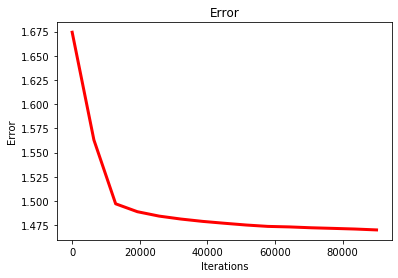

In [53]:
#plt.plot(range(len(loss_grap)),loss_grap,c='black')

xpt=np.linspace(0,len(loss_grap),len(mean_grap))
xpt=[int(i) for i in xpt]

plt.plot(xpt,mean_grap,c='red',lw=3)

plt.title('Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

## Accuracy

In [54]:
correct=0
total=0

with torch.no_grad():
    for data in tqdm(testset, desc='Accuracy calculation'):
        x,y=data
        x,y = x.to(device), y.to(device)
        output=net_class(x.view(-1,1,28,28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct +=1
            total+=1
            
print('Accuracy: ',round(correct/total,3))

Accuracy calculation: 100%|██████████| 1000/1000 [00:07<00:00, 134.44it/s]

Accuracy:  0.989


## New data

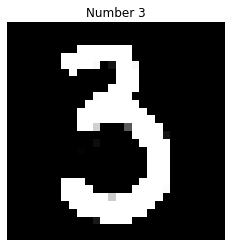

In [131]:
import cv2 

#Path
path1 = r'Nmnist\try.png'

#Image transformation
img = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
innn = torch.Tensor([i for i in img])
innn = innn.to(device)

#Passing through the network

net_res=net_class(innn.view(-1,1,28,28))
_, indices = torch.max(net_res.data, 1)

#Plotting
plt.imshow(img,cmap='gray')
plt.title(f'Number {indices.item()}')
plt.axis('off')
plt.show()

## Saving model

In [132]:
sv = False
if sv:
    torch.save(net_class.state_dict(), r'Nmnist\NNMnist.pt')
    torch.save(net_class, r'Nmnist\NNHandNumbers.pt')
    print('Model saved')
else:
    print('Model not saved')

Model not saved


## Loading Model

Model loaded



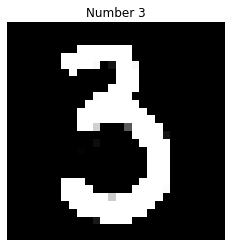

In [133]:
ld = True
if ld:
    load_model = torch.load(r'Nmnist\NNHandNumbers.pt')
    print('Model loaded\n')
    load_model = load_model.to(device)
    
    net_res=load_model(innn.view(-1,1,28,28))
    _, indices = torch.max(net_res.data, 1)

    #Plotting
    plt.imshow(img,cmap='gray')
    plt.title(f'Number {indices.item()}')
    plt.axis('off')
    plt.show()